TASK_01

MODEL_01

XGBRegressor   
hyper-parameter tuning_tuned gradient boosting

In [58]:
#importing necessary libraries and packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
#loading the data set
data = pd.read_csv(r"C:\Users\Amruthamsha P Raju\Downloads\gold_price_data (1).csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [60]:
#Feature engineering

# Convert Date to datetime and setting it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Interpolate missing values
data = data.interpolate(method='time')

# Adding rolling window features for trend analysis
data['GLD_day3_MA'] = data['GLD'].rolling(window=3).mean()
data['GLD_day7_MA'] = data['GLD'].rolling(window=7).mean()
data['GLD_day14_MA'] = data['GLD'].rolling(window=14).mean()

data['GLD_day3_STD'] = data['GLD'].rolling(window=3).std()
data['GLD_day7_STD'] = data['GLD'].rolling(window=7).std()
data['GLD_day14_STD'] = data['GLD'].rolling(window=14).std()

data['GLD_Lag01'] = data['GLD'].shift(1)
data['GLD_Lag02'] = data['GLD'].shift(2)
data['GLD_Lag03'] = data['GLD'].shift(3)

# Dropping rows with NaN values introduced by rolling calculations
data.dropna(inplace=True)

# Verify data after preprocessing
data.head()

,SPX,GLD,USO,SLV,EUR/USD,GLD_day3_MA,GLD_day7_MA,GLD_day14_MA,GLD_day3_STD,GLD_day7_STD,GLD_day14_STD,GLD_Lag01,GLD_Lag02,GLD_Lag03
Date,,,,,,,,,,,,,,
2008-01-22,1310.500000,88.169998,70.550003,15.902000,1.464794,87.363332,87.842856,86.914999,0.836440,1.067751,1.483757,87.419998,86.500000,86.699997
2008-01-23,1338.599976,87.889999,69.500000,15.900000,1.463208,87.826665,87.744284,87.131428,0.378990,1.019099,1.378176,88.169998,87.419998,86.500000
2008-01-24,1352.069946,90.080002,70.930000,16.299999,1.477410,88.713333,87.821427,87.453571,1.191821,1.184673,1.506268,87.889999,88.169998,87.419998
2008-01-25,1330.609985,90.300003,71.910004,16.298000,1.467502,89.423335,88.151428,87.822857,1.332456,1.515108,1.526407,90.080002,87.889999,88.169998
2008-01-28,1353.959961,91.750000,72.349998,16.549999,1.478809,90.710002,88.872857,88.321429,0.907357,1.869633,1.591115,90.300003,90.080002,87.889999


In [61]:
# Define features and target variable
X = data[['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD_day3_MA', 'GLD_day7_MA', 'GLD_day14_MA',
          'GLD_day3_STD', 'GLD_day7_STD', 'GLD_day14_STD', 'GLD_Lag01', 'GLD_Lag02', 'GLD_Lag03']]
y = data['GLD']

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


In [63]:
#hyper-parameter tuning: tuned gradient boosting
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize and training the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=101)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=101, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=101, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
#extracting the best parameters and model
best_est = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.9}


In [65]:
# Make predictions
best_est.fit(X_train, y_train)
y_pred = best_est.predict(X_test)

# Retrieve feature importances
importances = best_est.feature_importances_
feature_names = X.columns

# Display importance for each feature
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

SPX: 0.0001
USO: 0.0002
SLV: 0.0445
EUR/USD: 0.0002
GLD_day3_MA: 0.4900
GLD_day7_MA: 0.1259
GLD_day14_MA: 0.0011
GLD_day3_STD: 0.0003
GLD_day7_STD: 0.0002
GLD_day14_STD: 0.0002
GLD_Lag01: 0.3371
GLD_Lag02: 0.0001
GLD_Lag03: 0.0002


In [30]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.82
Mean Squared Error (MSE): 1.12
R-squared (R2): 0.95


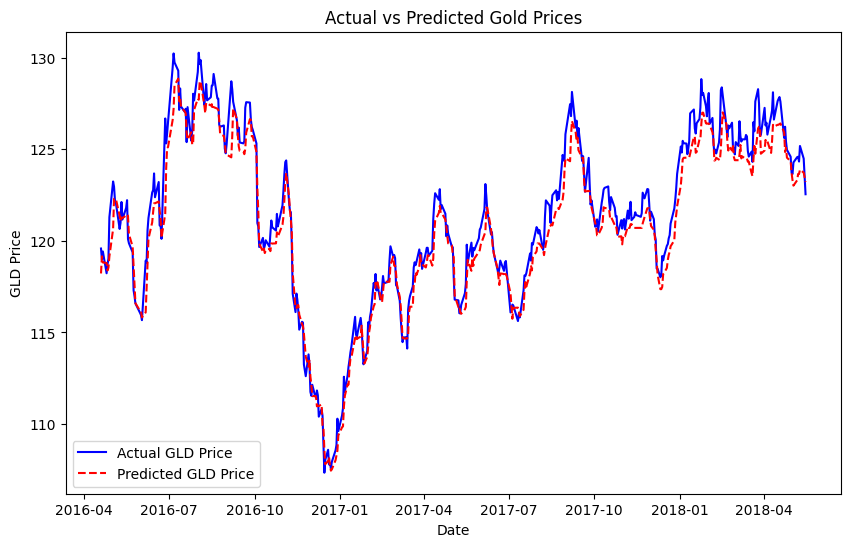

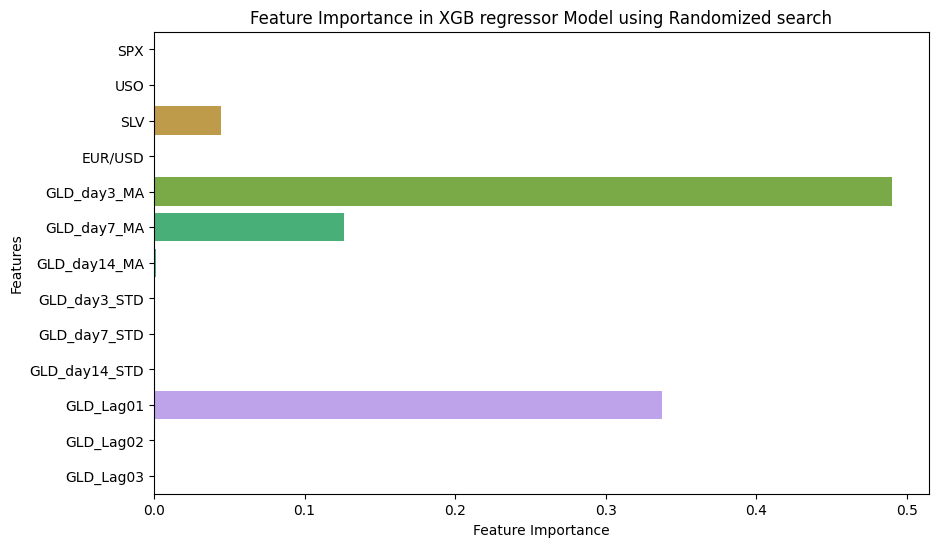

In [66]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual GLD Price', color='b')
plt.plot(y_test.index, y_pred, label='Predicted GLD Price', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_est.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGB regressor Model using Randomized search')
plt.show()

MODEL_02

RANDOM FOREST REGRESSOR

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

#inline plotting
%matplotlib inline

In [68]:
data = pd.read_csv(r"C:\Users\Amruthamsha P Raju\Downloads\gold_price_data (1).csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [69]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data.interpolate(method='time')

#feature engg: add rolling window features for tren analysis
data['GLD_day3_MA'] = data['GLD'].rolling(window=3).mean()
data['GLD_day7_MA'] = data['GLD'].rolling(window=7).mean()
data['GLD_day14_MA'] = data['GLD'].rolling(window=14).mean()

data['GLD_day3_STD'] = data['GLD'].rolling(window=3).std()
data['GLD_day7_STD'] = data['GLD'].rolling(window=7).std()
data['GLD_day14_STD'] = data['GLD'].rolling(window=14).std()

data['GLD_Lag01'] = data['GLD'].shift(1)
data['GLD_Lag02'] = data['GLD'].shift(2)
data['GLD_Lag03'] = data['GLD'].shift(3)



In [70]:
X = data[['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD_day3_MA', 'GLD_day7_MA', 'GLD_day14_MA', 'GLD_day3_STD', 'GLD_day7_STD', 'GLD_day14_STD', 'GLD_Lag01', 'GLD_Lag02', 'GLD_Lag03']]
y = data['GLD']

In [71]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42, shuffle = False)

In [73]:
# Hyperparameter tuning for Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Initialize and training the model
rf_model = RandomForestRegressor(random_state = 42)

random_search = RandomizedSearchCV(estimator = rf_model, param_distributions=param_grid, n_iter = 50, scoring = 'neg_mean_squared_error', cv = 3, verbose=2, random_state = 42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [75]:
# Fit the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

In [76]:
# Retrieve feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Display importance for each feature
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

SPX: 0.0142
USO: 0.0093
SLV: 0.1065
EUR/USD: 0.0020
GLD_day3_MA: 0.2396
GLD_day7_MA: 0.1511
GLD_day14_MA: 0.1129
GLD_day3_STD: 0.0003
GLD_day7_STD: 0.0007
GLD_day14_STD: 0.0012
GLD_Lag01: 0.1730
GLD_Lag02: 0.1221
GLD_Lag03: 0.0671


In [77]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.91
Mean Squared Error (MSE): 1.42
R-squared (R2): 0.94


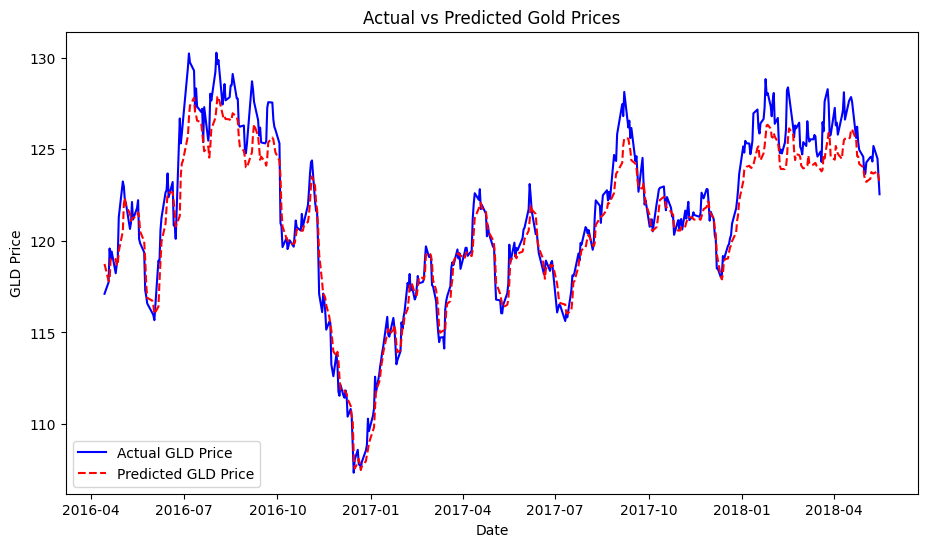

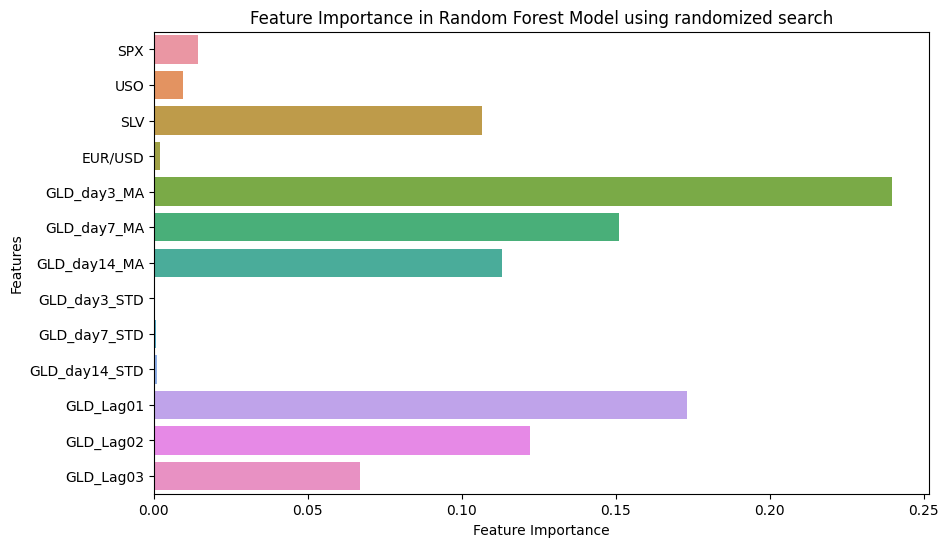

In [78]:
# Plot actual vs predicted values
plt.figure(figsize=(11, 6))
plt.plot(y_test.index, y_test, label='Actual GLD Price', color='b')
plt.plot(y_test.index, y_pred, label='Predicted GLD Price', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model using randomized search')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [80]:
#hyper -parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize and training the model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extracting the best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
# Fit the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

In [82]:
# Retrieve feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Display importance for each feature
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

SPX: 0.0108
USO: 0.0107
SLV: 0.1067
EUR/USD: 0.0031
GLD_day3_MA: 0.2747
GLD_day7_MA: 0.1672
GLD_day14_MA: 0.1200
GLD_day3_STD: 0.0003
GLD_day7_STD: 0.0004
GLD_day14_STD: 0.0012
GLD_Lag01: 0.1744
GLD_Lag02: 0.0664
GLD_Lag03: 0.0640


In [83]:
#evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.98
Mean Squared Error (MSE): 1.61
R-squared (R2): 0.93


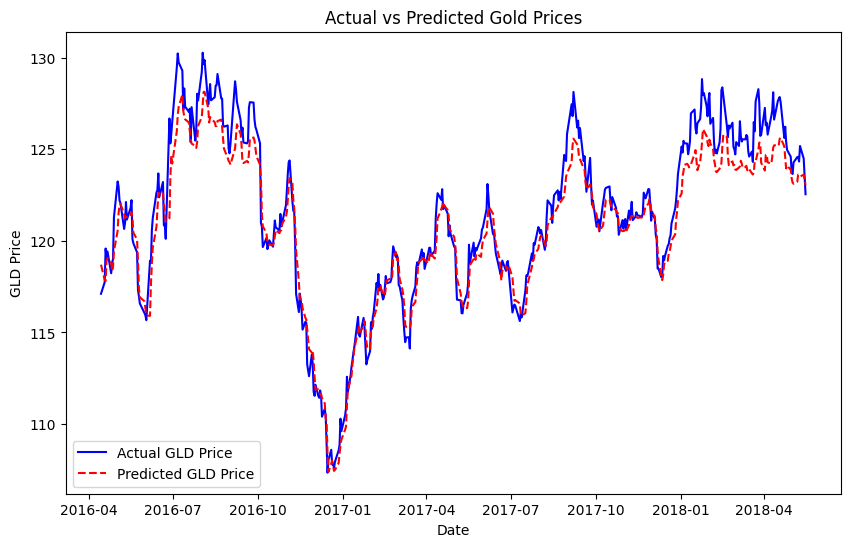

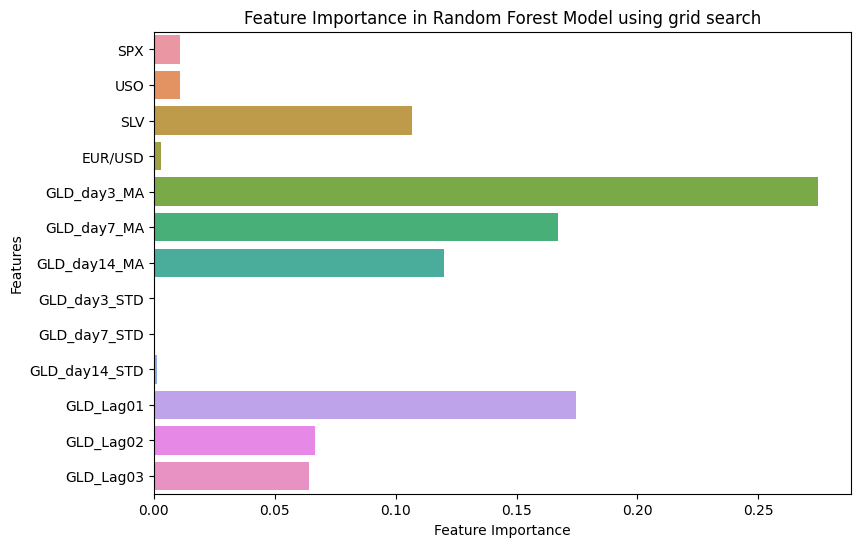

In [84]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual GLD Price', color='b')
plt.plot(y_test.index, y_pred, label='Predicted GLD Price', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

# Plot feature importance
plt.figure(figsize=(9, 6))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model using grid search')
plt.show()

               
SUPPORT VECTOR REGRESSOR

In [85]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

In [86]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Amruthamsha P Raju\Downloads\gold_price_data (1).csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [87]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Interpolate missing values (if any)
data = data.interpolate(method='time')

In [88]:
# Feature Engineering: Adding rolling window features for trend analysis
data['GLD_day3_MA'] = data['GLD'].rolling(window=3).mean()
data['GLD_day7_MA'] = data['GLD'].rolling(window=7).mean()
data['GLD_day14_MA'] = data['GLD'].rolling(window=14).mean()

data['GLD_day3_STD'] = data['GLD'].rolling(window=3).std()
data['GLD_day7_STD'] = data['GLD'].rolling(window=7).std()
data['GLD_day14_STD'] = data['GLD'].rolling(window=14).std()

data['GLD_Lag01'] = data['GLD'].shift(1)
data['GLD_Lag02'] = data['GLD'].shift(2)
data['GLD_Lag03'] = data['GLD'].shift(3)

# Dropping rows with NaN values introduced by rolling calculations
data.dropna(inplace=True)

In [89]:
# Define features and target variable
X = data[['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD_day3_MA', 'GLD_day7_MA', 'GLD_day14_MA', 'GLD_day3_STD', 'GLD_day7_STD', 'GLD_day14_STD', 'GLD_Lag01', 'GLD_Lag02', 'GLD_Lag03']]
y = data['GLD']

In [90]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

In [92]:
# Setting up the SVR model with GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize and training the model
svr = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [93]:
# Extracting the best parameters and model
best_svr_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Fit the best model
best_svr_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svr_model.predict(X_test)

Best parameters found:  {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}


In [95]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


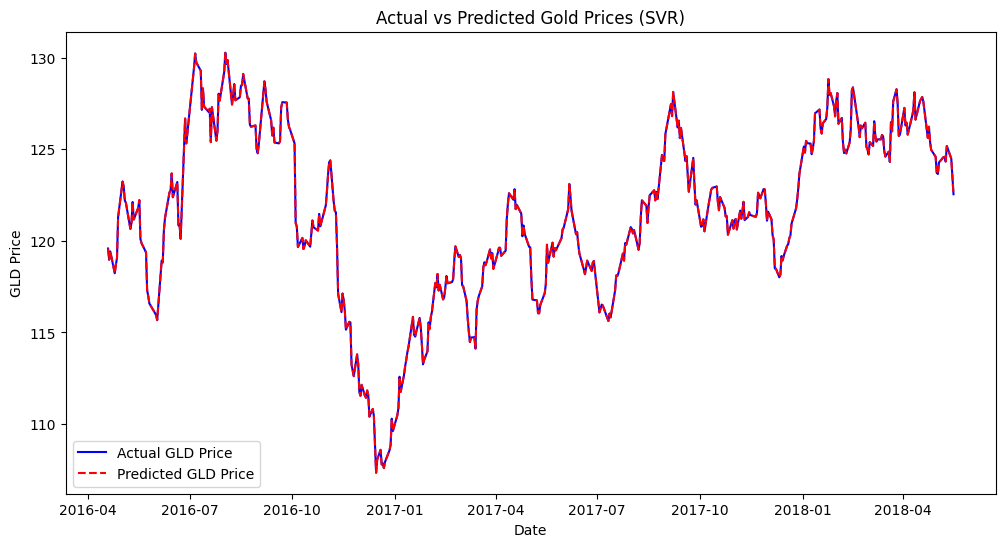

In [96]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual GLD Price', color='b')
plt.plot(y_test.index, y_pred, label='Predicted GLD Price', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted Gold Prices (SVR)')
plt.legend()
plt.show()

Conclusion: to predict gold rates, SVR model has performed the best among the models and its variations.
